<a href="https://colab.research.google.com/github/eudoxiamoura/CG-OpenCV/blob/main/Minicurso_FundamentosCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import requests
import zipfile

In [40]:
zip_url = "https://github.com/eudoxiamoura/CG-OpenCV/raw/main/img.zip"

zip_filename = "repositorio.zip"


print("Baixando o arquivo ZIP...")
response = requests.get(zip_url)
if response.status_code == 200:
    with open(zip_filename, "wb") as file:
        file.write(response.content)
    print(f"Arquivo {zip_filename} baixado com sucesso!")
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


extract_folder = "ifro"
print("Extraindo o arquivo ZIP...")
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    print(f"Arquivos extraídos para a pasta: {extract_folder}")

# Listar os arquivos extraídos
# print("Arquivos extraídos:")
# for root, dirs, files in os.walk(extract_folder):
#     for name in files:
#         print(os.path.join(root, name))

Baixando o arquivo ZIP...
Arquivo repositorio.zip baixado com sucesso!
Extraindo o arquivo ZIP...
Arquivos extraídos para a pasta: ifro


# Limiarização

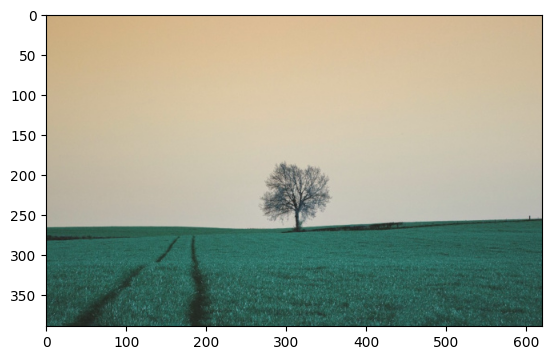

In [55]:
img = cv2.imread('/content/ifro/imagens/paisagem01.jpg')
plt.imshow(img)

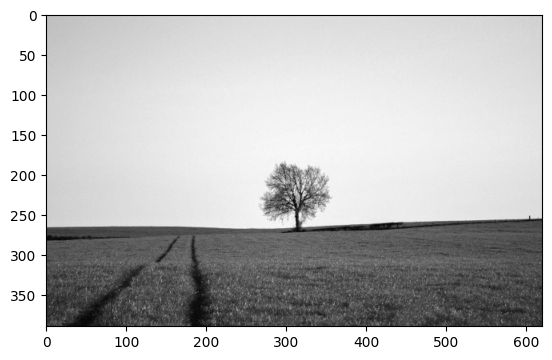

In [56]:
#converter cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#mostrar imagem
plt.imshow(gray, cmap='gray')

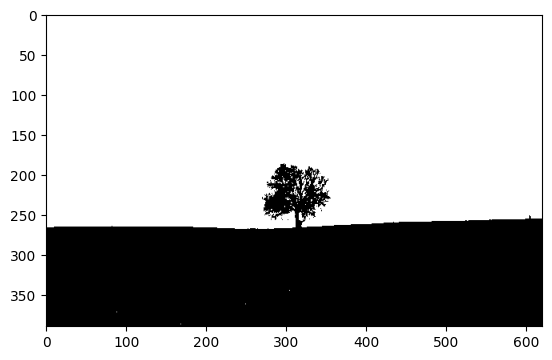

In [59]:
_, img_thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY) #testar outros THRESH
plt.imshow(img_thresh, cmap='gray')

# Operações Morfológicas

# OTSU

In [49]:
desfoque = cv2.GaussianBlur(gray, (5,5), 0)


136.0


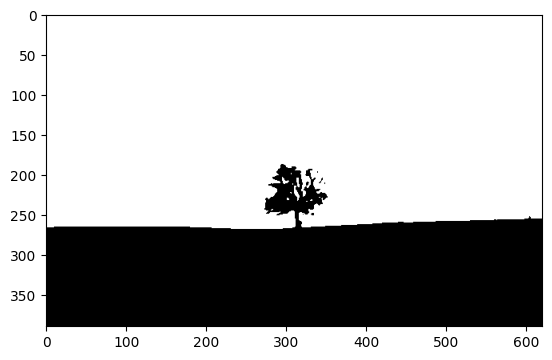

In [50]:
limiar_otsu, img_otsu = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(limiar_otsu)
plt.imshow(img_otsu, cmap='gray')

In [37]:
histograma, bins = np.histogram(gray, 256, [0,256])
histograma


array([    4,    35,    78,    91,   155,   237,   269,   318,   430,
         582,   627,   850,  1027,  1264,  1426,  1731,  1948,  2140,
        2390,  2674,  2916,  3011,  3273,  3235,  3525,  3512,  3660,
        3817,  3784,  3851,  3752,  3817,  3840,  3901,  3901,  3938,
        3891,  3930,  3942,  3810,  3734,  3711,  3853,  3754,  3724,
        3904,  3786,  3851,  3875,  3793,  3837,  3881,  3870,  3889,
        3755,  3749,  3817,  3666,  3754,  3716,  3661,  3798,  3737,
        3779,  3692,  3826,  3845,  3813,  3781,  3807,  3796,  3744,
        3716,  3749,  3649,  3711,  3759,  3702,  3671,  3701,  3869,
        3718,  3582,  3641,  3528,  3597,  3662,  3674,  3622,  3624,
        3632,  3677,  3626,  3712,  3724,  3632,  3665,  3730,  3713,
        3735,  3767,  3809,  3762,  3870,  3891,  3804,  3827,  3982,
        4016,  3954,  4069,  4165,  4224,  4268,  4332,  4414,  4457,
        4507,  4556,  4840,  4949,  5079,  5132,  5379,  5633,  5766,
        6028,  6246,

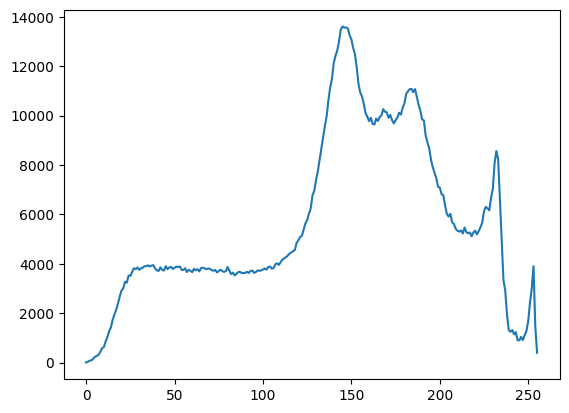

In [38]:
plt.plot(histograma)

#Segmentações baseado em bordas

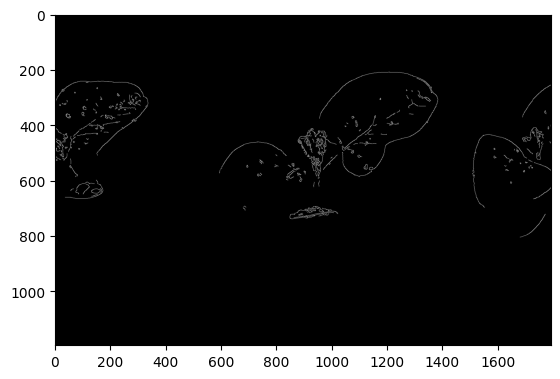

In [ ]:
desfoque = cv2.GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(desfoque, 80, 140)

plt.imshow(canny, cmap='gray')

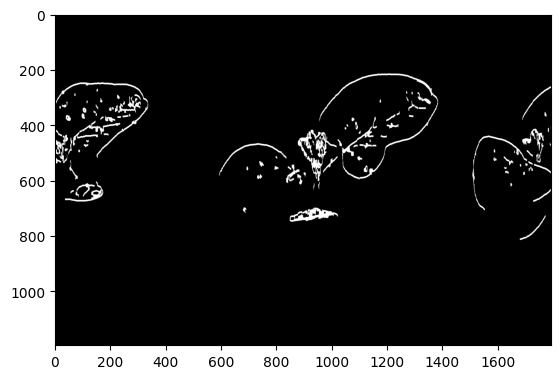

In [ ]:
dilatacao = cv2.dilate(canny, (9, 9), iterations=10)
erosao = cv2.erode(dilatacao, (9, 9), iterations=5)

plt.imshow(erosao, cmap='gray')